In [1]:
from sklearn.datasets import load_diabetes

In [2]:
dataset=load_diabetes()

In [4]:
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [7]:
import pandas as pd
df_diabetes=pd.DataFrame(dataset.data,columns=['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6'])

In [8]:
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [9]:
X=df_diabetes
y=dataset['target']

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [11]:
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
252,0.005383,-0.044642,0.059541,-0.056177,0.024574,0.052861,-0.043401,0.050914,-0.004222,-0.030072
416,-0.027310,-0.044642,0.080019,0.098751,-0.002945,0.018101,-0.017629,0.003312,-0.029526,0.036201
418,0.009016,-0.044642,-0.024529,-0.026328,0.098876,0.094196,0.070730,-0.002592,-0.021395,0.007207
163,0.016281,0.050680,0.072474,0.076958,-0.008449,0.005575,-0.006584,-0.002592,-0.023647,0.061054
253,0.081666,-0.044642,0.033673,0.008101,0.052093,0.056619,-0.017629,0.034309,0.034866,0.069338


In [12]:
X_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.196083,0.202593,0.367479,0.238894,0.194840,-0.119524,0.228041,0.302274,0.345631
sex,0.196083,1.000000,0.088119,0.229459,0.010085,0.117818,-0.370008,0.301513,0.147678,0.213834
bmi,0.202593,0.088119,1.000000,0.378013,0.217977,0.238805,-0.391322,0.411254,0.432327,0.374699
bp,0.367479,0.229459,0.378013,1.000000,0.224559,0.159546,-0.193113,0.244140,0.399925,0.376167
s1,0.238894,0.010085,0.217977,0.224559,1.000000,0.880910,0.018819,0.548260,0.544285,0.309938
s2,0.194840,0.117818,0.238805,0.159546,0.880910,1.000000,-0.240253,0.661777,0.321811,0.278650
s3,-0.119524,-0.370008,-0.391322,-0.193113,0.018819,-0.240253,1.000000,-0.752319,-0.395944,-0.316024
s4,0.228041,0.301513,0.411254,0.244140,0.548260,0.661777,-0.752319,1.000000,0.624991,0.440174
s5,0.302274,0.147678,0.432327,0.399925,0.544285,0.321811,-0.395944,0.624991,1.000000,0.472258
s6,0.345631,0.213834,0.374699,0.376167,0.309938,0.278650,-0.316024,0.440174,0.472258,1.000000


<Axes: >

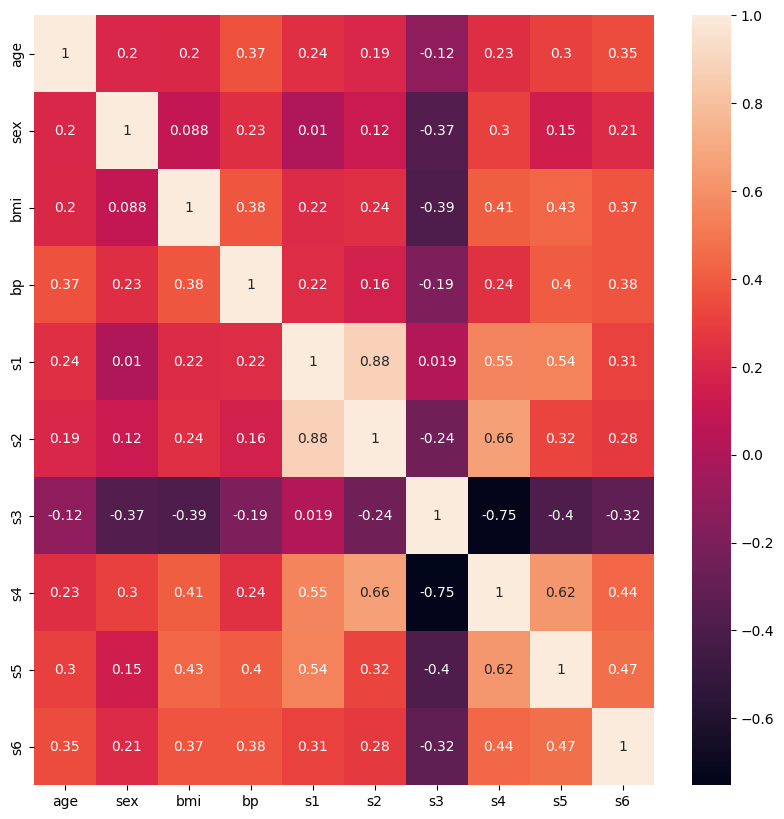

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(X_train.corr(),annot=True)


In [15]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [17]:
##hyper parameter tuning
param={
    'criterion':['squared_error','absolute_error','friedman_mse'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,15,20,25],
    'max_features':['auto','sqrt','log2']
}

In [18]:
from sklearn.model_selection import GridSearchCV

In [20]:
regressor=DecisionTreeRegressor()
grid=GridSearchCV(regressor,param_grid=param,cv=5,scoring='neg_mean_squared_error')

In [21]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse'],
                         'max_depth': [1, 2, 3, 4, 5, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [22]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'best'}

In [23]:
y_pred=grid.predict(X_test)

In [27]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.23803971541594438
4763.158897130796
57.43594150012011


In [30]:
from sklearn.metrics import confusion_matrix,classification_report